In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [290]:
train_data = pd.read_excel(r"/content/Data_Train.xlsx")
test_data = pd.read_excel(r"/content/Test_set.xlsx")

In [291]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Shape of the dataset

In [292]:
train_data.shape
#test_data.shape

(10683, 11)

Summary of the dataset

In [293]:
train_data.describe()
#test_data.describe

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [294]:
train_data.info()
#test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [295]:
train_data.dtypes
#test_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [296]:
train_data["Total_Stops"].value_counts()
#test_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

Missing value

In [297]:
train_data.isnull().sum()
#test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [298]:
train_data.dropna(inplace = True)
#test_data.dropna(inplace = True)

In [299]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Exploratory Data Analysis (EDA)

<Figure size 1800x1200 with 0 Axes>

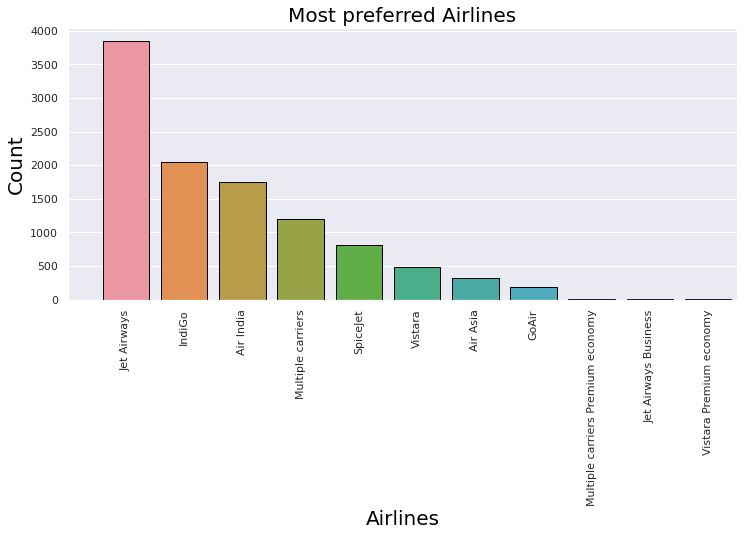

In [300]:
# Bar chart showing top 10 most preferred Airlines for train data
plt.figure(dpi=300)
plt.figure(figsize=(12,5))
sns.countplot(x="Airline", data=train_data,order = train_data['Airline'].value_counts().index,ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Most preferred Airlines",fontdict=font_style)
plt.ylabel("Count",fontdict=font_style)
plt.xlabel("Airlines",fontdict=font_style)
plt.xticks(rotation= 90)
plt.xlim(-1,10.5)
plt.show()

In [301]:
# Airlines Vs Flight ticket Price

airlines = train_data.groupby('Airline').Price.max()
airlines_df= airlines.to_frame().sort_values('Price',ascending=False)[0:10]
airlines_df

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


<Figure size 1800x1200 with 0 Axes>

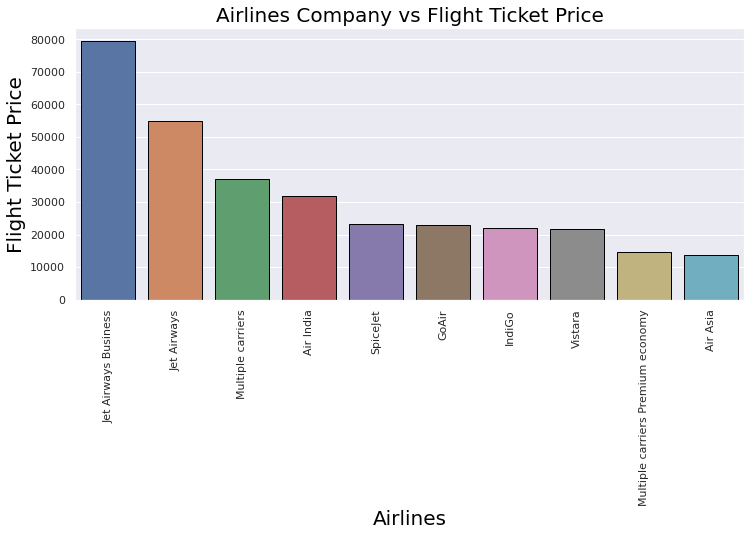

In [302]:
plt.figure(dpi=300)
plt.subplots(figsize=(12,5))
sns.barplot(x=airlines_df.index, y=airlines_df["Price"],ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Airlines Company vs Flight Ticket Price",fontdict=font_style )
plt.ylabel("Flight Ticket Price", fontdict=font_style)
plt.xlabel("Airlines", fontdict=font_style)
plt.xticks(rotation=90)
plt.show()

In [303]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day


In [304]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month


In [305]:
train_data["Journey_year"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.year


In [306]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [307]:
# Since we have converted Date_of_Journey column into integers, Now we can drop.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)


In [308]:
# Departure time is when a plane leaves the gate.
# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute
# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [309]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [310]:
# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [311]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [312]:
# Time taken by plane to reach destination is called Duration
# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [313]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins


In [314]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [315]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


Handling Categorical Data

In [316]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

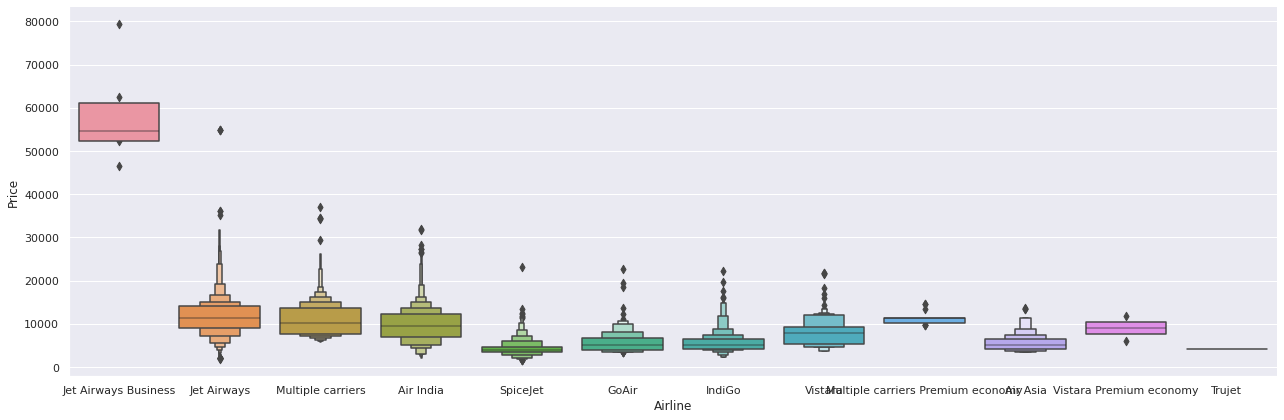

In [317]:
# From graph we can see that Jet Airways Business have the highest Price.
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Label Encoding

In [318]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [319]:
train_data['Airline'] = encoder.fit_transform(train_data['Airline'])

In [320]:
train_data['Airline'].value_counts()


4     3849
3     2053
1     1751
6     1196
8      818
10     479
0      319
2      194
7       13
5        6
11       3
9        1
Name: Airline, dtype: int64

In [321]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,4,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,3,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,3,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [322]:
#train_data["Source"].value_counts()
train_data["Destination"].value_counts()
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [323]:
train_data['Source'] = encoder.fit_transform(train_data['Source'])
train_data['Destination'] = encoder.fit_transform(train_data['Destination'])
train_data['Total_Stops'] = encoder.fit_transform(train_data['Total_Stops'])


In [324]:
train_data['Total_Stops'].value_counts()

0    5625
4    3491
1    1520
2      45
3       1
Name: Total_Stops, dtype: int64

In [325]:
train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [326]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,4,3897,24,3,2019,22,20,1,10,2,50
1,1,3,0,1,7662,1,5,2019,5,50,13,15,7,25
2,4,2,1,1,13882,9,6,2019,9,25,4,25,19,0
3,3,3,0,0,6218,12,5,2019,18,5,23,30,5,25
4,3,0,5,0,13302,1,3,2019,16,50,21,35,4,45


**Test set**

In [327]:
test_data = pd.read_excel(r"/content/Test_set.xlsx")

In [328]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [329]:
test_data.shape

(2671, 10)

In [330]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [331]:
test_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [332]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

<Figure size 1800x1200 with 0 Axes>

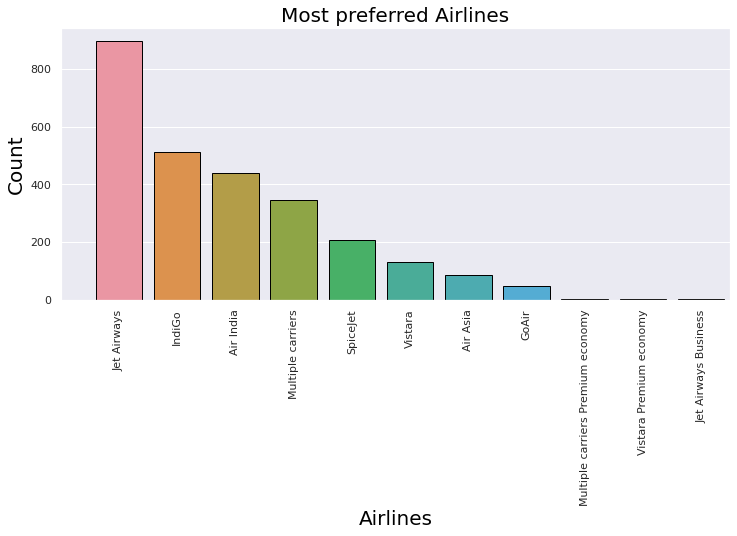

In [333]:
# Bar chart showing top 10 most preferred Airlines for train data
plt.figure(dpi=300)
plt.figure(figsize=(12,5))
sns.countplot(x="Airline", data=test_data,order = test_data['Airline'].value_counts().index,ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Most preferred Airlines",fontdict=font_style)
plt.ylabel("Count",fontdict=font_style)
plt.xlabel("Airlines",fontdict=font_style)
plt.xticks(rotation= 90)
plt.xlim(-1,10.5)
plt.show()

In [334]:
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data["Journey_year"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.year

In [335]:
# Since we have converted Date_of_Journey column into integers, Now we can drop.

test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [336]:
# Departure time is when a plane leaves the gate.
# Extracting Hours
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
# Extracting Minutes
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
# Now we can drop Dep_Time as it is of no use
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [337]:
# Extracting Hours
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour

# Extracting Minutes
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [338]:
# Time taken by plane to reach destination is called Duration
# Assigning and converting Duration column into list
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [339]:
# Adding duration_hours and duration_mins list to train_data dataframe

test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

Handling Categorical Data

In [340]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [341]:
test_data["Airline"].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [342]:
test_data['Airline'] = encoder.fit_transform(test_data['Airline'])
test_data['Source'] = encoder.fit_transform(test_data['Source'])
test_data['Destination'] = encoder.fit_transform(test_data['Destination'])
test_data['Total_Stops'] = encoder.fit_transform(test_data['Total_Stops'])

In [343]:
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [344]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,4,2,1,0,6,6,2019,17,30,4,25,10,55
1,3,3,0,0,12,5,2019,6,20,10,20,4,0
2,4,2,1,0,21,5,2019,19,15,19,0,23,45
3,6,2,1,0,21,5,2019,8,0,21,0,13,0
4,0,0,2,4,24,6,2019,23,55,2,45,2,50


Feature Selection

In [345]:
train_data.shape

(10682, 14)

In [346]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Journey_year', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [347]:
X = train_data.loc[:, ['Airline', 'Source', 'Destination', 'Total_Stops',
       'Journey_day', 'Journey_month', 'Journey_year', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins']]
X.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,4,24,3,2019,22,20,1,10,2,50
1,1,3,0,1,1,5,2019,5,50,13,15,7,25
2,4,2,1,1,9,6,2019,9,25,4,25,19,0
3,3,3,0,0,12,5,2019,18,5,23,30,5,25
4,3,0,5,0,1,3,2019,16,50,21,35,4,45


In [348]:
y = train_data.iloc[:, 4]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

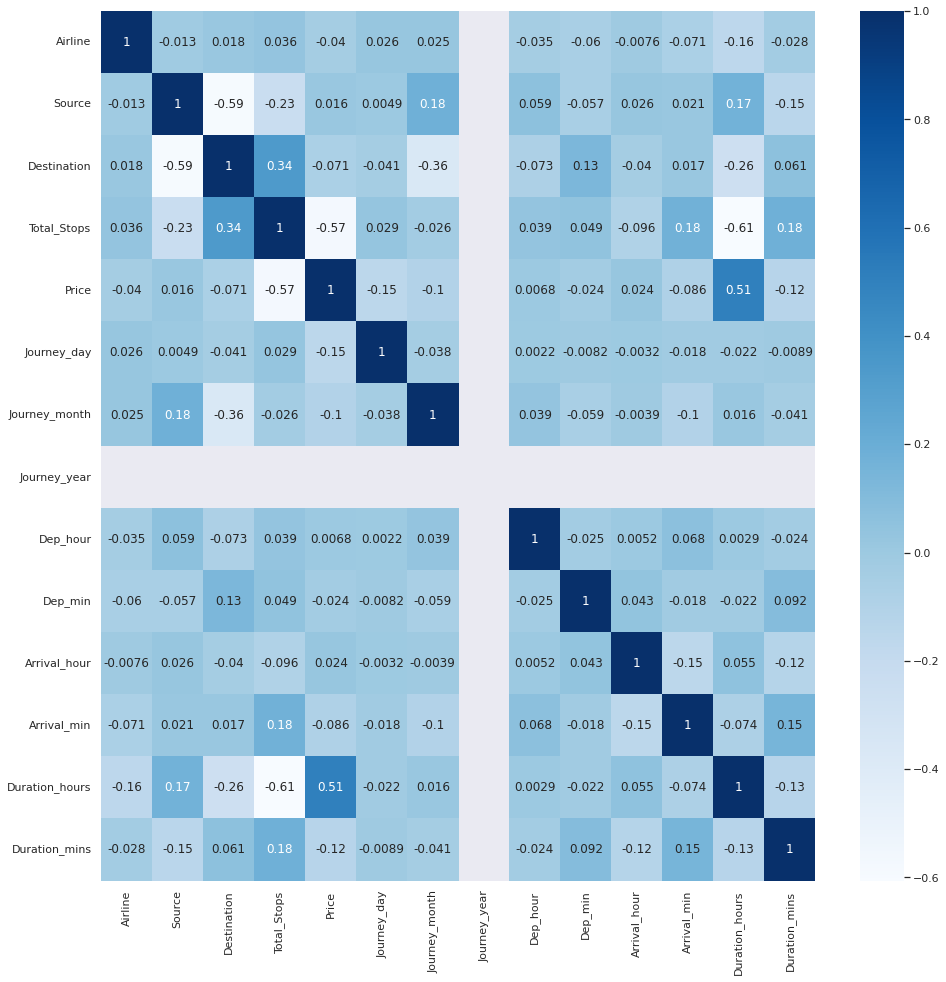

In [349]:
# constructing a heatmap to understand the correlatiom
correlation = train_data.corr()
plt.figure(figsize = (16,16))
sns.heatmap(train_data.corr(), annot = True, cmap = "Blues")

plt.show()

In [350]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [351]:
print(selection.feature_importances_)

[0.13632537 0.01688296 0.03109224 0.3777106  0.15866611 0.04928589
 0.         0.02851307 0.02701249 0.03447623 0.02369241 0.095997
 0.02034565]


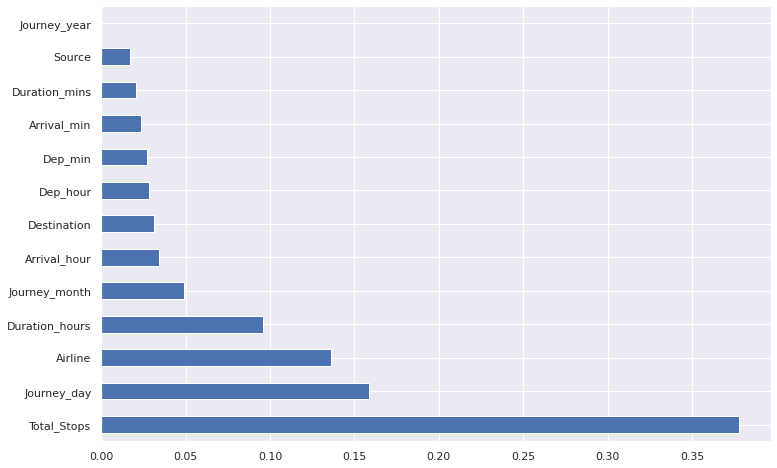

In [352]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [353]:
# Splitting Training and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
10005,6,2,1,0,27,5,2019,8,30,19,15,10,45
3684,4,2,1,0,9,5,2019,11,30,12,35,25,5
1034,8,2,1,0,24,4,2019,15,45,22,5,6,20
3909,6,2,1,0,21,3,2019,12,50,1,35,12,45
3088,1,2,1,1,24,6,2019,17,15,19,15,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,4,2,1,0,27,3,2019,9,0,4,25,19,25
5191,4,3,0,0,9,5,2019,14,5,20,45,6,40
5390,6,2,1,0,15,5,2019,12,50,1,30,12,40
860,3,0,5,4,3,3,2019,0,40,3,25,2,45


Model Training

In [354]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

# Linear Regression
linear_reg_model = LinearRegression()

In [355]:
linear_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [356]:
# prediction on Training data
train_dat_predic = linear_reg_model.predict(X_train)

In [357]:
# R squared Error
from sklearn import metrics
error_score = metrics.r2_score(Y_train, train_dat_predic)
print("R squared Error : ", error_score)

R squared Error :  0.414193120702091


Lasso Regression


In [358]:
# loading the Lasso Regression
from sklearn.linear_model import Lasso
lass_reg_model = Lasso()

In [359]:
# model training
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [360]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [361]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.41419301283240473


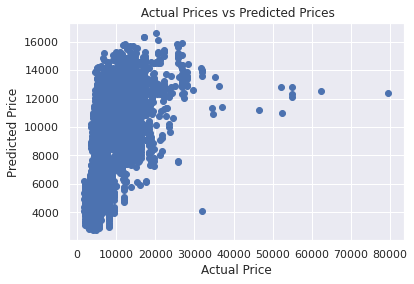

In [362]:
# Visualize the actual prices and Predicted prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

RandomForestRegressor

In [363]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100)

In [364]:
# model training
rf_model.fit(X_train,Y_train)

RandomForestRegressor()

In [365]:
# prediction on Training data
training_data_predic = rf_model.predict(X_train)

In [366]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_predic)
print("R squared Error : ", error_score)

R squared Error :  0.9533359729369633


In [367]:
rf_model.score(X_test, Y_test)

0.7880807394648928

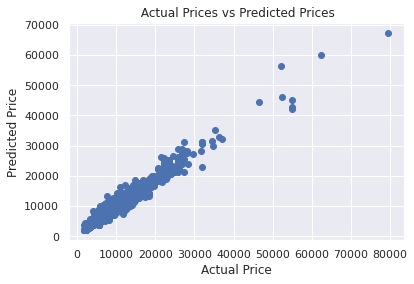

In [368]:
# Visualize the actual prices and Predicted prices
plt.scatter(Y_train, training_data_predic)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

XGBoost

In [369]:
import xgboost as xgb
XB = xgb.XGBRegressor()

In [370]:
XB.fit(X_train,Y_train)

[07:38:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [371]:
# prediction on Training data
training_data_predic = XB.predict(X_train)

In [372]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_predic)
print("R squared Error : ", error_score)

R squared Error :  0.768667311293654


In [373]:
XB.score(X_test, Y_test)

0.787747483330048

Support Vector Machine (SVM)

In [374]:
from sklearn.svm import LinearSVR
SVM = LinearSVR()

In [375]:
# model training
SVM.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [376]:
# prediction on Training data
training_data_predic = SVM.predict(X_train)

In [377]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_predic)
print("R squared Error : ", error_score)

R squared Error :  -0.016450791296084954


In [378]:
SVM.score(X_test, Y_test)

0.003519843895059438

Build a predict system

In [379]:
input_data = (1,	3,	0,	1,	1,	5, 2019,	5,	50,	13,	15,	7,	25)

In [380]:
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_model.predict(input_data_reshaped)
print(prediction)

[7596.19]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Save the model to reuse it again

In [381]:
import pickle
# open a file, where you ant to store the data
file = open('Flight_Price_Prediction_model.pkl', 'wb')

In [382]:
# dump information to that file
pickle.dump(rf_model, file)

In [383]:
model_car_price = open('Flight_Price_Prediction_model.pkl','rb')
rf= pickle.load(model_car_price )

In [384]:
print(rf_model.predict([[1,	3,	0,	1,	1,	5, 2019,	5,	50,	13,	15,	7,	25]]))

[7596.19]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
